In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from dynamic_portfolio.utils import load_csv

In [101]:
temp = load_csv('V')

/Users/ericvincent/code/dynamic_portfolio/dynamic_portfolio/utils.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['return'][0]=0


In [102]:
temp

,date,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient,reportedEPS,...,fed_funds,unemployment_rate,inf_exp,non_farm_payroll,CPI,retail_sales,gdp_per_capita,gold_price,usd_price,return
0,2008-04-28,76.22,77.29,74.9000,75.63,17.040247,33129300.0,0.0,1.0,0.13,...,0.0229,5.0,0.048,137896.0,214.823,331002.0,51923.0,892.5000,72.790001,0.000000
1,2008-04-29,73.28,80.88,71.0000,80.88,18.223128,49327100.0,0.0,1.0,0.13,...,0.0221,5.0,0.048,137896.0,214.823,331002.0,51923.0,870.0500,72.889999,0.069417
2,2008-04-30,81.21,84.81,81.0700,83.45,18.802177,36885900.0,0.0,1.0,0.13,...,0.0237,5.0,0.048,137896.0,214.823,331002.0,51923.0,869.9500,72.510002,0.031775
3,2008-05-01,84.68,87.64,83.9000,85.40,19.241532,29098900.0,0.0,1.0,0.13,...,0.0216,5.4,0.052,138470.0,216.632,357277.0,51923.0,851.6500,73.279999,0.023367
4,2008-05-02,87.25,87.50,81.0000,82.75,18.644459,34162200.0,0.0,1.0,0.13,...,0.0188,5.4,0.052,138470.0,216.632,357277.0,51923.0,855.4500,73.500000,-0.031030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3629,2022-11-16,208.58,210.89,208.2200,210.14,210.140000,6125300.0,0.0,1.0,1.93,...,0.0383,3.7,0.050,154369.0,298.012,597492.0,60082.0,1773.7700,106.279999,0.000714
3630,2022-11-17,207.96,211.28,207.3243,210.99,210.990000,5386197.0,0.0,1.0,1.93,...,0.0383,3.7,0.050,154369.0,298.012,597492.0,60082.0,1760.8700,106.690002,0.004045
3631,2022-11-18,213.17,214.17,209.7400,210.80,210.800000,8028541.0,0.0,1.0,1.93,...,0.0383,3.7,0.050,154369.0,298.012,597492.0,60082.0,1749.7400,106.930000,-0.000901
3632,2022-11-21,210.30,210.55,205.8900,206.32,206.320000,10450939.0,0.0,1.0,1.93,...,0.0383,3.7,0.050,154369.0,298.012,597492.0,60082.0,1737.8081,107.839996,-0.021252


In [36]:
cpi = pd.read_csv('../raw_data/macro/cpi.csv', index_col=0)

In [41]:
df = cpi.iloc[0:13,:]

In [46]:
df['CPI'] = pd.to_numeric(df['CPI'])

/var/folders/kt/jxv1lsvj67x2t9_8lqfh68tw0000gn/T/ipykernel_57225/2862910927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CPI'] = pd.to_numeric(df['CPI'])


In [48]:
df.dtypes

date     object
CPI     float64
dtype: object

In [50]:
df['CPI'].pct_change(periods=12)

273         NaN
272         NaN
271         NaN
270         NaN
269         NaN
268         NaN
267         NaN
266         NaN
265         NaN
264         NaN
263         NaN
262         NaN
261    0.037322
Name: CPI, dtype: float64

In [54]:
df['CPI'].pct_change()

273         NaN
272    0.005924
271    0.008245
270    0.000584
269    0.001168
268    0.005248
267    0.002320
266    0.000000
265    0.005208
264    0.001727
263    0.000575
262   -0.000574
261    0.006322
Name: CPI, dtype: float64

In [57]:
np.cumproduct(df['CPI'].pct_change()+1)

273         NaN
272    1.005924
271    1.014218
270    1.014810
269    1.015995
268    1.021327
267    1.023697
266    1.023697
265    1.029028
264    1.030806
263    1.031398
262    1.030806
261    1.037322
Name: CPI, dtype: float64

In [53]:
df

,date,CPI
273,2000-01-01,168.8
272,2000-02-01,169.8
271,2000-03-01,171.2
270,2000-04-01,171.3
269,2000-05-01,171.5
268,2000-06-01,172.4
267,2000-07-01,172.8
266,2000-08-01,172.8
265,2000-09-01,173.7
264,2000-10-01,174.0


In [28]:
temp

,date,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient,reportedEPS,...,fed_funds,unemployment_rate,inf_exp,non_farm_payroll,CPI,retail_sales,gdp_per_capita,gold_price,usd_price,return
0,2008-04-28,76.22,77.29,74.9000,75.63,17.040247,33129300.0,0.0,1.0,0.13,...,0.0229,5.0,0.048,137896.0,214.823,331002.0,51923.0,892.5000,72.790001,0.000000
1,2008-04-29,73.28,80.88,71.0000,80.88,18.223128,49327100.0,0.0,1.0,0.13,...,0.0221,5.0,0.048,137896.0,214.823,331002.0,51923.0,870.0500,72.889999,0.069417
2,2008-04-30,81.21,84.81,81.0700,83.45,18.802177,36885900.0,0.0,1.0,0.13,...,0.0237,5.0,0.048,137896.0,214.823,331002.0,51923.0,869.9500,72.510002,0.031775
3,2008-05-01,84.68,87.64,83.9000,85.40,19.241532,29098900.0,0.0,1.0,0.13,...,0.0216,5.4,0.052,138470.0,216.632,357277.0,51923.0,851.6500,73.279999,0.023367
4,2008-05-02,87.25,87.50,81.0000,82.75,18.644459,34162200.0,0.0,1.0,0.13,...,0.0188,5.4,0.052,138470.0,216.632,357277.0,51923.0,855.4500,73.500000,-0.031030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3629,2022-11-16,208.58,210.89,208.2200,210.14,210.140000,6125300.0,0.0,1.0,1.93,...,0.0383,3.7,0.050,154369.0,298.012,597492.0,60082.0,1773.7700,106.279999,0.000714
3630,2022-11-17,207.96,211.28,207.3243,210.99,210.990000,5386197.0,0.0,1.0,1.93,...,0.0383,3.7,0.050,154369.0,298.012,597492.0,60082.0,1760.8700,106.690002,0.004045
3631,2022-11-18,213.17,214.17,209.7400,210.80,210.800000,8028541.0,0.0,1.0,1.93,...,0.0383,3.7,0.050,154369.0,298.012,597492.0,60082.0,1749.7400,106.930000,-0.000901
3632,2022-11-21,210.30,210.55,205.8900,206.32,206.320000,10450939.0,0.0,1.0,1.93,...,0.0383,3.7,0.050,154369.0,298.012,597492.0,60082.0,1737.8081,107.839996,-0.021252


In [29]:
temp['date'] = pd.to_datetime(temp['date'])

In [30]:
temp['year'] = pd.DatetimeIndex(temp['date']).year

In [32]:
temp['10Y_yield']

0       0.0386
1       0.0385
2       0.0377
3       0.0378
4       0.0389
         ...  
3629    0.0367
3630    0.0377
3631    0.0382
3632    0.0383
3633    0.0376
Name: 10Y_yield, Length: 3634, dtype: float64

In [31]:
temp['year'].value_counts()

2009    250
2010    250
2011    250
2013    250
2014    250
2015    250
2016    250
2020    250
2017    249
2019    249
2021    249
2012    248
2018    246
2022    222
2008    171
Name: year, dtype: int64

In [26]:
temp['year'].value_counts().mean()

247.2173913043478

In [16]:
temp['surprisePercentage']

0       33.3333
1        0.0000
2        0.0000
3        0.0000
4        0.0000
         ...   
5681     0.0000
5682     0.0000
5683     0.0000
5684     0.0000
5685     0.0000
Name: surprisePercentage, Length: 5686, dtype: float64

In [14]:
108.75/103.37

1.0520460481764535

In [6]:
X = temp.drop(columns='return')

In [7]:
X.columns

Index(['date', 'open', 'high', 'low', 'close', 'adjusted_close', 'volume',
       'dividend_amount', 'split_coefficient', 'reportedEPS',
       'surprisePercentage', '10Y_yield', '2Y_yield', '10_2_spread',
       'oil_price', 'orders', 'fed_funds', 'unemployment_rate', 'inf_exp',
       'non_farm_payroll', 'CPI', 'retail_sales', 'gdp_per_capita',
       'gold_price', 'usd_price'],
      dtype='object')

In [8]:
temp.dtypes

date                   object
open                  float64
high                  float64
low                   float64
close                 float64
adjusted_close        float64
volume                float64
dividend_amount       float64
split_coefficient     float64
reportedEPS           float64
surprisePercentage    float64
10Y_yield             float64
2Y_yield              float64
10_2_spread           float64
oil_price             float64
orders                float64
fed_funds             float64
unemployment_rate     float64
inf_exp               float64
non_farm_payroll      float64
CPI                   float64
retail_sales          float64
gdp_per_capita        float64
gold_price            float64
usd_price             float64
return                float64
dtype: object

In [9]:
import seaborn as sns

/var/folders/kt/jxv1lsvj67x2t9_8lqfh68tw0000gn/T/ipykernel_57225/3524554562.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = temp.corr()


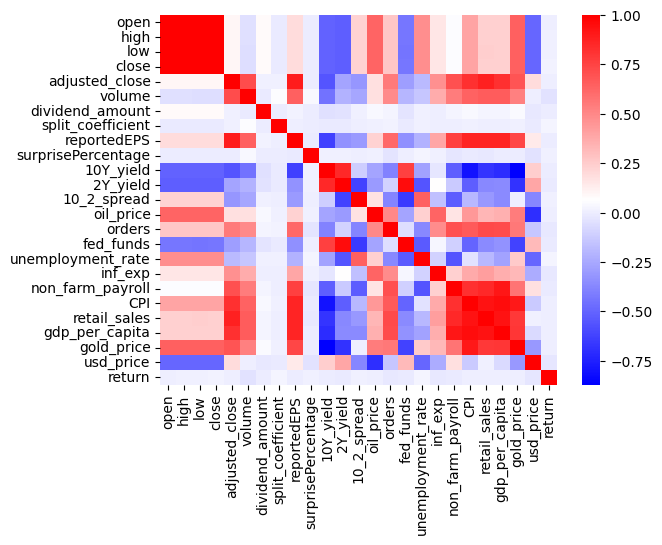

In [10]:
correlation_matrix = temp.corr()
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr");

In [19]:
# Converting the correlation matrix into a DataFrame
corr_df = correlation_matrix.stack().reset_index()

# Renaming the columns
corr_df.columns = ['feature_1','feature_2', 'correlation']

# Remove "self correlations"
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
corr_df = corr_df[no_self_correlation]

In [22]:
# Computing the absolute correlation
corr_df['absolute_correlation'] = np.abs(corr_df['correlation'])

# Showing the top 5 most correlated pairs of feature
corr_df.sort_values(by="absolute_correlation", ascending=False).head(5*2)

,feature_1,feature_2,correlation,absolute_correlation
1,open,high,0.999896,0.999896
22,high,open,0.999896,0.999896
67,close,high,0.999884,0.999884
25,high,close,0.999884,0.999884
47,low,close,0.999875,0.999875
68,close,low,0.999875,0.999875
44,low,open,0.999861,0.999861
2,open,low,0.999861,0.999861
45,low,high,0.999829,0.999829
24,high,low,0.999829,0.999829


In [104]:
X.columns

Index(['date', 'open', 'high', 'low', 'close', 'adjusted_close', 'volume',
       'dividend_amount', 'split_coefficient', 'reportedEPS',
       'surprisePercentage', '10Y_yield', '2Y_yield', '10_2_spread',
       'oil_price', 'orders', 'fed_funds', 'unemployment_rate', 'inf_exp',
       'non_farm_payroll', 'CPI', 'retail_sales', 'gdp_per_capita',
       'gold_price', 'usd_price'],
      dtype='object')

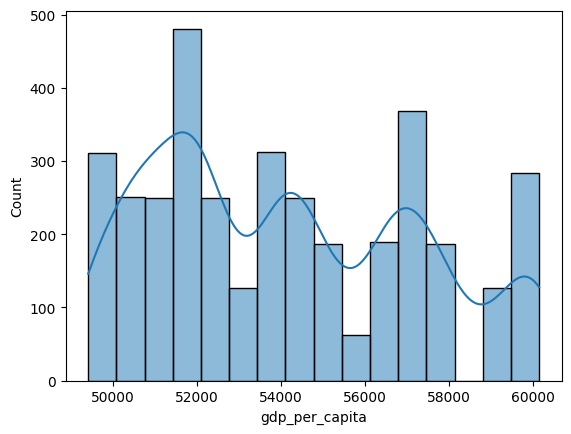

In [116]:
sns.histplot(data=temp['gdp_per_capita'], kde=True);

In [103]:
from sklearn.preprocessing import StandardScaler

#std_scaler = StandardScaler()
df['curbweight'] = std_scaler.fit_transform(df[['curbweight']])
#df.head()

to standard scale : 
- volume
- 10Y yield
- 2Y yield
- oil price
- orders
- fed_funds
- unemplyment_rate
- inf_exp
- non_farm_payroll
- CPI
- retail_sales
- gdp_per_capita


In [1]:
from dynamic_portfolio.utils import load_csv
from dynamic_portfolio.utils import features_creation

In [4]:
temp = load_csv('AAPL')

/Users/ericvincent/code/dynamic_portfolio/dynamic_portfolio/utils.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['return'][0]=0


In [23]:
list(temp.columns)

['date',
 'open',
 'high',
 'low',
 'close',
 'adjusted_close',
 'volume',
 'dividend_amount',
 'split_coefficient',
 'reportedEPS',
 'surprisePercentage',
 '10Y_yield',
 '2Y_yield',
 '10_2_spread',
 'oil_price',
 'orders',
 'fed_funds',
 'unemployment_rate',
 'inf_exp',
 'non_farm_payroll',
 'CPI',
 'retail_sales',
 'gdp_per_capita',
 'gold_price',
 'usd_price',
 'return']

In [5]:
temp

,date,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient,reportedEPS,surprisePercentage,10Y_yield,2Y_yield,10_2_spread,oil_price,orders,fed_funds,unemployment_rate,inf_exp,non_farm_payroll,CPI,retail_sales,gdp_per_capita,gold_price,usd_price,return
0,2000-01-19,105.620,108.75,103.370,106.56,0.810916,5336100.0,0.0,1.0,0.04,0.333333,0.0673,0.0646,0.0027,29.11,185813.0,0.0547,0.040,0.03,128992.0,168.800,213709.0,45983.0,289.1500,101.760002,0.000000
1,2000-01-20,115.500,121.50,113.500,113.50,0.863729,16349400.0,0.0,1.0,0.04,0.000000,0.0679,0.0649,0.0030,29.67,185813.0,0.0544,0.040,0.03,128992.0,168.800,213709.0,45983.0,288.2500,101.360001,0.065128
2,2000-01-21,114.250,114.25,110.190,111.31,0.847063,4427900.0,0.0,1.0,0.04,0.000000,0.0679,0.0648,0.0031,29.71,185813.0,0.0536,0.040,0.03,128992.0,168.800,213709.0,45983.0,288.7000,101.760002,-0.019295
3,2000-01-24,108.440,112.75,105.120,106.25,0.808557,3936400.0,0.0,1.0,0.04,0.000000,0.0669,0.0643,0.0026,29.25,185813.0,0.0553,0.040,0.03,128992.0,168.800,213709.0,45983.0,287.4000,102.199997,-0.045459
4,2000-01-25,105.000,113.12,102.370,112.25,0.854216,4438800.0,0.0,1.0,0.04,0.000000,0.0670,0.0644,0.0026,30.28,185813.0,0.0546,0.040,0.03,128992.0,168.800,213709.0,45983.0,285.6000,102.410004,0.056471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5681,2022-11-16,149.130,149.87,147.290,148.79,148.790000,64218266.0,0.0,1.0,1.29,0.000000,0.0367,0.0435,-0.0068,85.62,273451.0,0.0383,0.037,0.05,154369.0,298.012,597492.0,60082.0,1773.7700,106.279999,-0.008331
5682,2022-11-17,146.430,151.48,146.150,150.72,150.720000,80389400.0,0.0,1.0,1.29,0.000000,0.0377,0.0443,-0.0066,81.69,273451.0,0.0383,0.037,0.05,154369.0,298.012,597492.0,60082.0,1760.8700,106.690002,0.012971
5683,2022-11-18,152.305,152.70,149.970,151.29,151.290000,74829573.0,0.0,1.0,1.29,0.000000,0.0382,0.0451,-0.0069,80.07,273451.0,0.0383,0.037,0.05,154369.0,298.012,597492.0,60082.0,1749.7400,106.930000,0.003782
5684,2022-11-21,150.160,150.37,147.715,148.01,148.010000,58724070.0,0.0,1.0,1.29,0.000000,0.0383,0.0448,-0.0065,79.74,273451.0,0.0383,0.037,0.05,154369.0,298.012,597492.0,60082.0,1737.8081,107.839996,-0.021680


In [6]:
temp.columns

Index(['date', 'open', 'high', 'low', 'close', 'adjusted_close', 'volume',
       'dividend_amount', 'split_coefficient', 'reportedEPS',
       'surprisePercentage', '10Y_yield', '2Y_yield', '10_2_spread',
       'oil_price', 'orders', 'fed_funds', 'unemployment_rate', 'inf_exp',
       'non_farm_payroll', 'CPI', 'retail_sales', 'gdp_per_capita',
       'gold_price', 'usd_price', 'return'],
      dtype='object')

In [7]:
feat = features_creation('AAPL')

/Users/ericvincent/code/dynamic_portfolio/dynamic_portfolio/utils.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['return'][0]=0


In [8]:
feat.columns

Index(['date', 'open', 'volume', 'dividend_amount', 'split_coefficient',
       'reportedEPS', 'surprisePercentage', '10Y_yield', '2Y_yield',
       '10_2_spread', 'oil_price', 'orders', 'fed_funds', 'unemployment_rate',
       'inf_exp', 'non_farm_payroll', 'CPI', 'retail_sales', 'gdp_per_capita',
       'gold_price', 'usd_price', 'return', 'high/low', 'volatility_5days',
       'volatility_10days', 'volatility_20days', 'momentum_5days',
       'momentum_10days', 'momentum_20days', 'distance_5days',
       'distance_10days', 'distance_20days', 'volume_5days', 'volume_10days',
       'volume_20days', 'price/eps', 'momentum_5days/eps',
       'momentum_10days/eps', 'momentum_20days/eps', 'gold_return',
       '10Y_return', '2Y_return', 'spread_return', 'oil_return', 'usd_return',
       'cpi_return', 'gdp_return'],
      dtype='object')

In [9]:
feat.isnull().sum()

date                   0
open                   0
volume                 0
dividend_amount        0
split_coefficient      0
reportedEPS            0
surprisePercentage     0
10Y_yield              0
2Y_yield               0
10_2_spread            0
oil_price              0
orders                 0
fed_funds              0
unemployment_rate      0
inf_exp                0
non_farm_payroll       0
CPI                    0
retail_sales           0
gdp_per_capita         0
gold_price             0
usd_price              0
return                 0
high/low               0
volatility_5days       0
volatility_10days      0
volatility_20days      0
momentum_5days         0
momentum_10days        0
momentum_20days        0
distance_5days         0
distance_10days        0
distance_20days        0
volume_5days           0
volume_10days          0
volume_20days          0
price/eps              0
momentum_5days/eps     0
momentum_10days/eps    0
momentum_20days/eps    0
gold_return            0


In [10]:
import seaborn as sns

<AxesSubplot: xlabel='dividend_amount', ylabel='Count'>

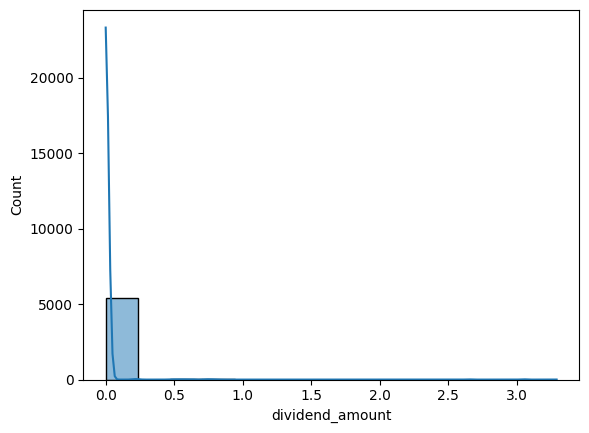

In [20]:
sns.histplot(data=feat['dividend_amount'], kde=True)

In [22]:
feat['dividend_amount'].nunique()

14